In [1]:
import os
import sys
root_folder = os.path.dirname(os.getcwd())
sys.path.append(root_folder)
from ResoFit._pulse_shape import NeutronPulse
from ResoFit._pulse_shape import ProtonPulse
from ResoFit.experiment import Experiment
import numpy as np
from ResoFit.simulation import Simulation
import scipy.signal as ss
import matplotlib.pyplot as plt
import scipy

In [2]:
%matplotlib notebook
overwrite_csv = False
folder = 'data/IPTS_19558/reso_data_19558'
data_file1 = 'Gd_thick.csv'
spectra_file = 'Image002_Spectra.txt'
experiment1 = Experiment(data_file=data_file1,
                         spectra_file=spectra_file,
                         folder=folder,
                         baseline=True)
# experiment1.slice(slice_start=300, reset_index=False)
# peak_df = experiment1.find_peak()
source_to_detector_m = 16.45
simulation = Simulation(energy_min=78, energy_max=82, energy_step=0.01, database='ENDF_VII')
simulation.add_layer(layer='Gd', layer_thickness_mm=0.15)

Fitted params for raw proton pulse shape:
Name          Value      Min      Max   Stderr     Vary     Expr Brute_Step
amplitude  1.984e+04     -inf      inf    36.58     True     None     None
center         1909     -inf      inf   0.3126     True     None     None
fwhm          345.7     -inf      inf   0.7362    False 2.3548200*sigma     None
height         53.9     -inf      inf  0.09941    False 0.3989423*amplitude/max(1.e-15, sigma)     None
sigma         146.8        0      inf   0.3126     True     None     None


/Users/y9z/anaconda3/envs/py36/lib/python3.6/site-packages/lmfit/models.py:30: FutureWarning:

'argmin' is deprecated. Use 'idxmin' instead. The behavior of 'argmin' will be corrected to return the positional minimum in the future. Use 'series.values.argmin' to get the position of the minimum now.



In [3]:
simulation._convolve_beam_shapes(source_to_detector_m=source_to_detector_m, conv_proton=False)
x_n = simulation.x_tof_us
y_n = 1-simulation.y_att

✅ '/Users/y9z/Documents/GitHub/ResoFit/ResoFit/result/neutron_pulse/ikeda_carpenter/Neutron_fitted_params_1eV_500eV_ikeda_carpenter.csv' exists...
Fitted parameters file loaded.
✅ '/Users/y9z/Documents/GitHub/ResoFit/ResoFit/result/neutron_pulse/ikeda_carpenter/Loglog_linear_within_1eV_500eV_ikeda_carpenter.csv' exists...
Parameters linear fitted file loaded.
✅ '/Users/y9z/Documents/GitHub/ResoFit/ResoFit/result/neutron_pulse/ikeda_carpenter/TOF_shape_eV_78.0_82.0_0.01_us_0.05_183.7_0.01_for_sum_16.45m_ikeda_carpenter.csv' exists...
TOF neutron beam shape file loaded.


/Users/y9z/anaconda3/envs/py36/lib/python3.6/site-packages/lmfit/models.py:30: FutureWarning:

'argmin' is deprecated. Use 'idxmin' instead. The behavior of 'argmin' will be corrected to return the positional minimum in the future. Use 'series.values.argmin' to get the position of the minimum now.



In [4]:
simulation._convolve_beam_shapes(source_to_detector_m=source_to_detector_m, conv_proton=True)
x_np = simulation.x_tof_us
y_np = 1-simulation.y_att

✅ '/Users/y9z/Documents/GitHub/ResoFit/ResoFit/result/neutron_pulse/ikeda_carpenter/Neutron_fitted_params_1eV_500eV_ikeda_carpenter.csv' exists...
Fitted parameters file loaded.
✅ '/Users/y9z/Documents/GitHub/ResoFit/ResoFit/result/neutron_pulse/ikeda_carpenter/Loglog_linear_within_1eV_500eV_ikeda_carpenter.csv' exists...
Parameters linear fitted file loaded.
❌ No previous TOF neutron beam shape file named '/Users/y9z/Documents/GitHub/ResoFit/ResoFit/result/neutron_pulse/ikeda_carpenter/TOF_shape_eV_78.0_82.0_0.01_us_0.05_183.7_0.01_proton_for_sum_16.45m_ikeda_carpenter.csv' detected.
Beam shape generation starts...
For 16.45 (m)
78.0 (eV) neutron spent 134.64941073604192 (us)
78.01 (eV) neutron spent 134.64078019340985 (us)
78.02 (eV) neutron spent 134.6321513101252 (us)
78.03 (eV) neutron spent 134.62352408565638 (us)
78.04 (eV) neutron spent 134.61489851947195 (us)


/Users/y9z/anaconda3/envs/py36/lib/python3.6/site-packages/lmfit/models.py:30: FutureWarning:

'argmin' is deprecated. Use 'idxmin' instead. The behavior of 'argmin' will be corrected to return the positional minimum in the future. Use 'series.values.argmin' to get the position of the minimum now.



78.05 (eV) neutron spent 134.60627461104067 (us)
78.06 (eV) neutron spent 134.5976523598317 (us)
78.07 (eV) neutron spent 134.58903176531427 (us)
78.08 (eV) neutron spent 134.5804128269579 (us)
78.09 (eV) neutron spent 134.57179554423251 (us)
78.1 (eV) neutron spent 134.5631799166079 (us)
78.11 (eV) neutron spent 134.55456594355445 (us)
78.12 (eV) neutron spent 134.54595362454262 (us)
78.13 (eV) neutron spent 134.53734295904312 (us)
78.14 (eV) neutron spent 134.52873394652696 (us)
78.15 (eV) neutron spent 134.5201265864652 (us)
78.16 (eV) neutron spent 134.5115208783295 (us)
78.17 (eV) neutron spent 134.50291682159136 (us)
78.18 (eV) neutron spent 134.49431441572267 (us)
78.19 (eV) neutron spent 134.48571366019573 (us)
78.2 (eV) neutron spent 134.47711455448274 (us)
78.21 (eV) neutron spent 134.46851709805645 (us)
78.22 (eV) neutron spent 134.45992129038964 (us)
78.23 (eV) neutron spent 134.45132713095546 (us)
78.24 (eV) neutron spent 134.4427346192272 (us)
78.25 (eV) neutron spent 134

79.8 (eV) neutron spent 133.12214684727448 (us)
79.81 (eV) neutron spent 133.11380664447537 (us)
79.82 (eV) neutron spent 133.1054680090398 (us)
79.83 (eV) neutron spent 133.097130940477 (us)
79.84 (eV) neutron spent 133.0887954382963 (us)
79.85 (eV) neutron spent 133.08046150200718 (us)
79.86 (eV) neutron spent 133.0721291311195 (us)
79.87 (eV) neutron spent 133.06379832514327 (us)
79.88 (eV) neutron spent 133.0554690835887 (us)
79.89 (eV) neutron spent 133.04714140596613 (us)
79.9 (eV) neutron spent 133.03881529178634 (us)
79.91 (eV) neutron spent 133.0304907405601 (us)
79.92 (eV) neutron spent 133.02216775179852 (us)
79.93 (eV) neutron spent 133.01384632501285 (us)
79.94 (eV) neutron spent 133.00552645971467 (us)
79.95 (eV) neutron spent 132.99720815541562 (us)
79.96 (eV) neutron spent 132.98889141162763 (us)
79.97 (eV) neutron spent 132.98057622786288 (us)
79.98 (eV) neutron spent 132.97226260363368 (us)
79.99 (eV) neutron spent 132.96395053845265 (us)
80.0 (eV) neutron spent 132.9

81.55 (eV) neutron spent 131.68605147586425 (us)
81.56 (eV) neutron spent 131.67797827281123 (us)
81.57 (eV) neutron spent 131.6699065543942 (us)
81.58 (eV) neutron spent 131.66183632015816 (us)
81.59 (eV) neutron spent 131.65376756964832 (us)
81.6 (eV) neutron spent 131.64570030241018 (us)
81.61 (eV) neutron spent 131.63763451798926 (us)
81.62 (eV) neutron spent 131.6295702159314 (us)
81.63 (eV) neutron spent 131.62150739578257 (us)
81.64 (eV) neutron spent 131.61344605708902 (us)
81.65 (eV) neutron spent 131.6053861993971 (us)
81.66 (eV) neutron spent 131.59732782225336 (us)
81.67 (eV) neutron spent 131.58927092520463 (us)
81.68 (eV) neutron spent 131.58121550779782 (us)
81.69 (eV) neutron spent 131.57316156958018 (us)
81.7 (eV) neutron spent 131.56510911009897 (us)
81.71 (eV) neutron spent 131.55705812890187 (us)
81.72 (eV) neutron spent 131.54900862553646 (us)
81.73 (eV) neutron spent 131.5409605995508 (us)
81.74 (eV) neutron spent 131.532914050493 (us)
81.75 (eV) neutron spent 131

80.64 (eV) neutron ...
80.65 (eV) neutron ...
80.66 (eV) neutron ...
80.67 (eV) neutron ...
80.68 (eV) neutron ...
80.69 (eV) neutron ...
80.7 (eV) neutron ...
80.71 (eV) neutron ...
80.72 (eV) neutron ...
80.73 (eV) neutron ...
80.74 (eV) neutron ...
80.75 (eV) neutron ...
80.76 (eV) neutron ...
80.77 (eV) neutron ...
80.78 (eV) neutron ...
80.79 (eV) neutron ...
80.8 (eV) neutron ...
80.81 (eV) neutron ...
80.82 (eV) neutron ...
80.83 (eV) neutron ...
80.84 (eV) neutron ...
80.85 (eV) neutron ...
80.86 (eV) neutron ...
80.87 (eV) neutron ...
80.88 (eV) neutron ...
80.89 (eV) neutron ...
80.9 (eV) neutron ...
80.91 (eV) neutron ...
80.92 (eV) neutron ...
80.93 (eV) neutron ...
80.94 (eV) neutron ...
80.95 (eV) neutron ...
80.96 (eV) neutron ...
80.97 (eV) neutron ...
80.98 (eV) neutron ...
80.99 (eV) neutron ...
81.0 (eV) neutron ...
81.01 (eV) neutron ...
81.02 (eV) neutron ...
81.03 (eV) neutron ...
81.04 (eV) neutron ...
81.05 (eV) neutron ...
81.06 (eV) neutron ...
81.07 (eV) neut

<IPython.core.display.Javascript object>


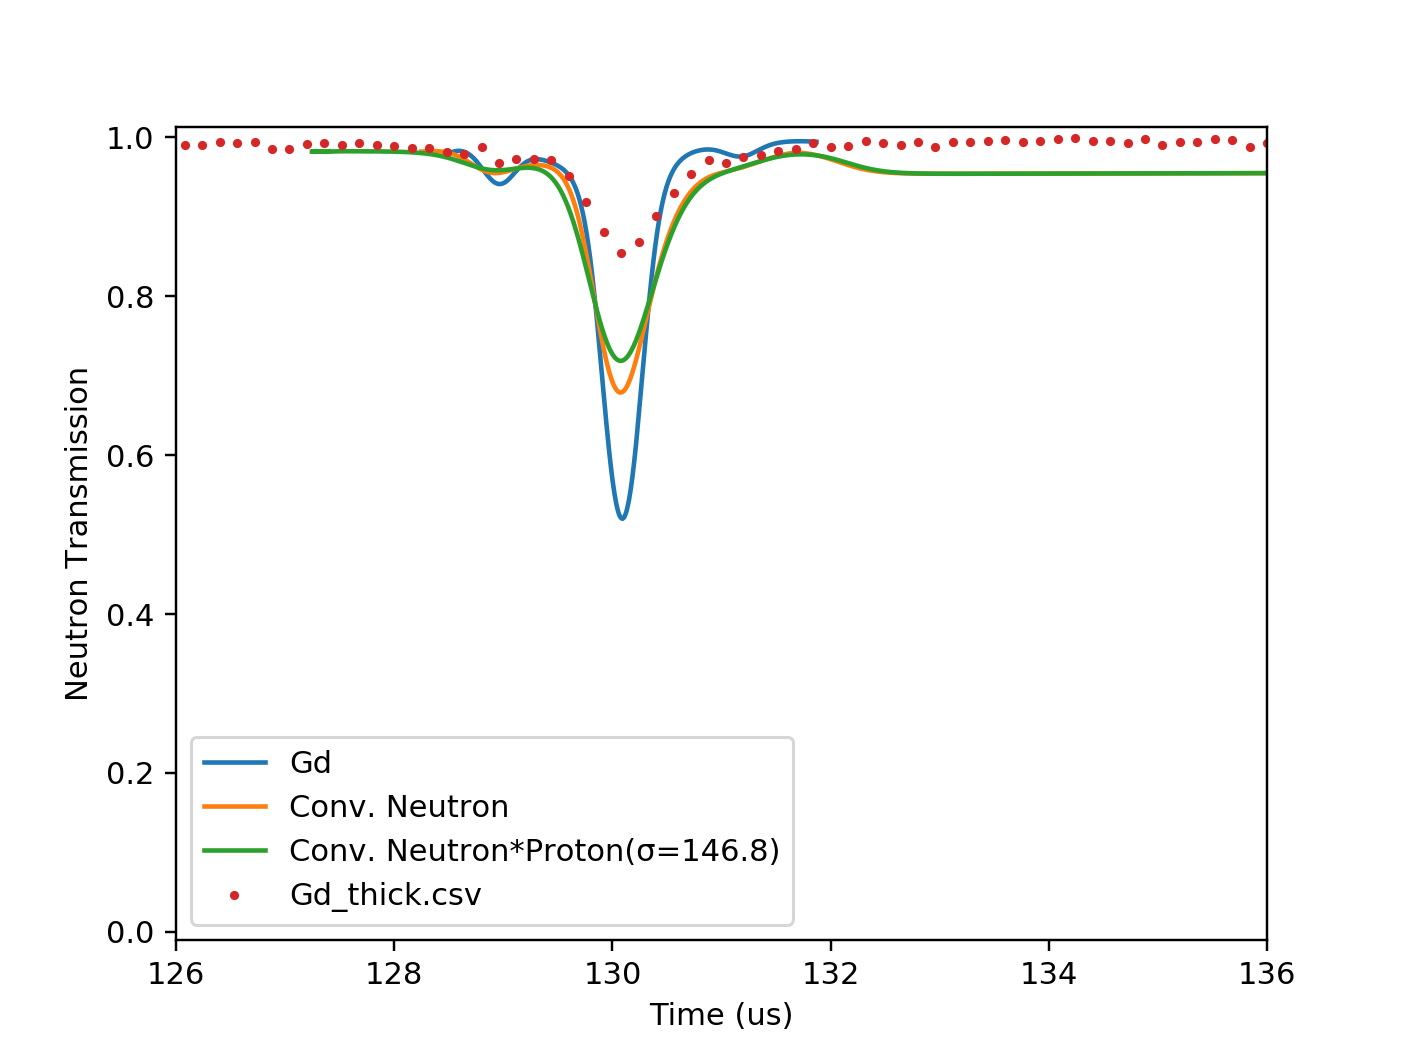

'Time (us)' was obtained with the following:
source_to_detector_m=16.45
offset_us=2.78


In [5]:
d = 5.2
fig = simulation.plot_simu(x_type='time', y_type='transmission', source_to_detector_m=source_to_detector_m, offset_us=2.78,
                          mixed=False, all_layers=True)
fig.axes[0].plot(x_n+1.95-d, y_n, label='Conv. Neutron')
fig.axes[0].plot(x_np+0.03-d, y_np, label='Conv. Neutron*Proton(\u03C3=146.8)')
ax = experiment1.plot_raw(x_type='time', y_type='transmission', time_unit='us', ax_mpl=fig.axes[0])
# ax.plot(x_np300-d, y_np300, label='Conv. Neutron*Proton(\u03C3=300)')
# ax.plot(x_np500-d, y_np500, label='Conv. Neutron*Proton(\u03C3=500)')
# experiment1.plot_raw(x_type='time', y_type='transmission', time_unit='us', ax_mpl=fig.axes[0])
# plt.plot(simulation.x_tof_us-5.2, 1-simulation.y_att, label='Conv. N*P(\u03C3=146.8)')
ax.set_xlim(left=126, right=136)
ax.legend()

In [6]:
simulation.neutron_pulse.shape_tof_df_interp

,tof_us,78.0,78.01,78.02,78.03,78.04,78.05,78.06,78.07,78.08,...,81.91,81.92,81.93,81.94,81.95,81.96,81.97,81.98,81.99,82.0
0,131.374221,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,131.382229,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,131.390239,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,131.398250,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,131.406263,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,131.414277,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,131.422293,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,131.427521,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,131.430310,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,131.434351,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
